In [1]:
#Standard imports

import pandas as pd
import numpy as np

In [2]:
#load our Dataframe

diamonds_df = pd.read_csv('diamonds.csv')

In [3]:
#View Dataframe

diamonds_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
#Look at data frame information

diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
#Checking for missing values

diamonds_df.count()

Unnamed: 0    53940
carat         53940
cut           53940
color         53940
clarity       53940
depth         53940
table         53940
price         53940
x             53940
y             53940
z             53940
dtype: int64

In [6]:
#Drop our Unnamed : 0 column, it is just a repeat

diamonds_df = diamonds_df.drop('Unnamed: 0', axis = 1)

In [7]:
#Verify it was dropped

diamonds_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
#Look at the statistics of the columns that are left

diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
#More dataframe manipulation, depth is really a calculation and not actual diamond depth. 

diamonds_df.rename(columns={'depth': 'depth_percentage'}, inplace=True)
diamonds_df['length'] = diamonds_df['x']
diamonds_df['width'] = diamonds_df['y']
diamonds_df['depth'] = diamonds_df['z']
diamonds_df = diamonds_df.drop(columns = ['x', 'y', 'z'])
diamonds_df

,carat,cut,color,clarity,depth_percentage,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


{'whiskers': [<matplotlib.lines.Line2D at 0x22c9c835b10>,
 'caps': [<matplotlib.lines.Line2D at 0x22c9c78abd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c9c834ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x22c9c848e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c9c849990>],
 'means': []}

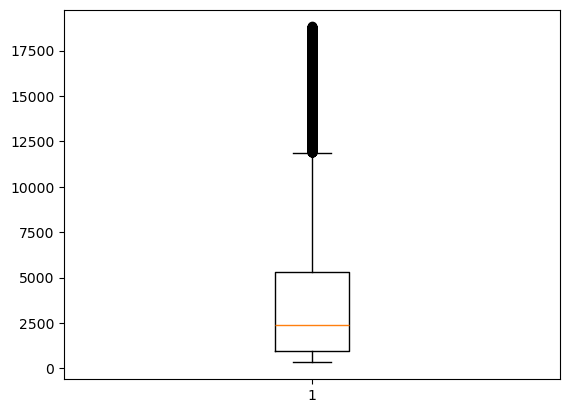

In [10]:
#A visualization to check for outliers in our target column.

import matplotlib.pyplot as plt
plt.boxplot(diamonds_df['price'])

In [11]:
#Create our bounds to check for outliers

Q1 = diamonds_df['price'].quantile(0.25)
Q3 = diamonds_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [12]:
print(lower_bound)
print(upper_bound)

-5611.375
11885.625


In [13]:
#We are only concerned with the upper bound, so filter out any diamonds price over our upper bound.

diamonds_df = diamonds_df[diamonds_df['price'] <= 11885.625]

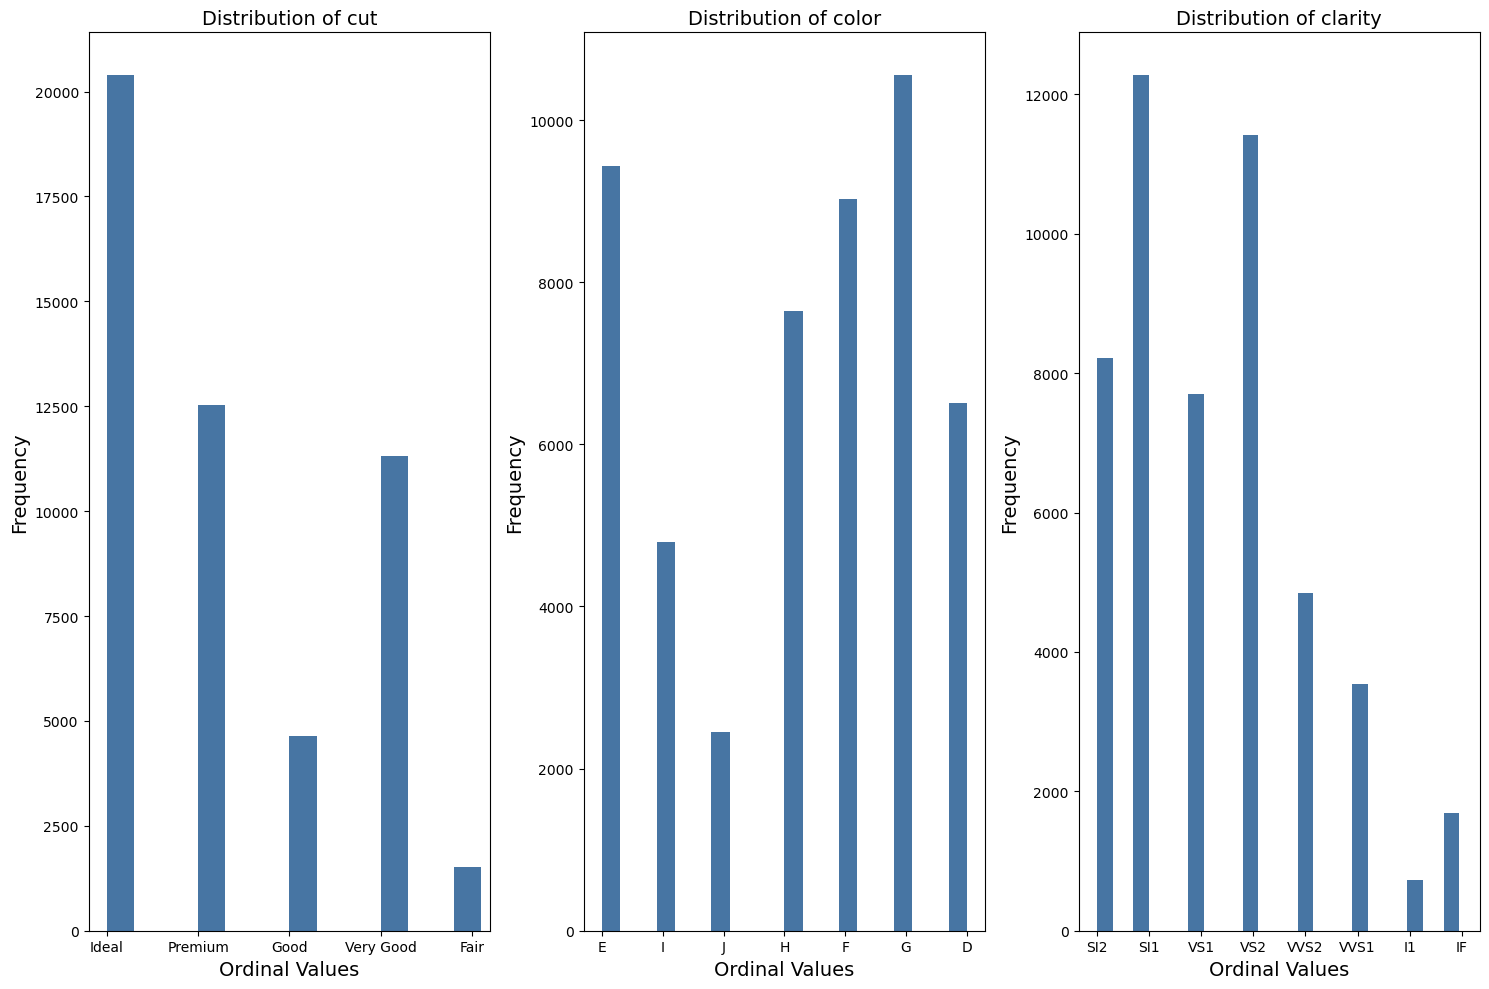

In [14]:
#Plotting the distribution of my ordinal factors

ordinal_columns = diamonds_df[['cut', 'color', 'clarity']]

import matplotlib.pyplot as plt
#  Create a plot for all of my categorical variables to see patterns, distribution, and compare it with other categories
fig, axes = plt.subplots(1, 3, figsize=(15, 10))  # Adjust figsize as needed

# Flatten axes to simplify indexing
axes = axes.flatten()

# Plot each variable
for i, column in enumerate(ordinal_columns.columns):
    ax = axes[i]
    ax.hist(ordinal_columns[column], bins=20, alpha=0.90, width=0.3, color=(0.2, 0.4, 0.6))
    ax.set_title(f'Distribution of {column}', fontsize = 14)
    ax.set_xlabel('Ordinal Values', fontsize=14)
    ax.set_ylabel('Frequency', fontsize = 14)


#_ = [axes[j].set_visible(False) for j in range(len(object_column1.columns), len(axes))]

plt.tight_layout()
plt.show()

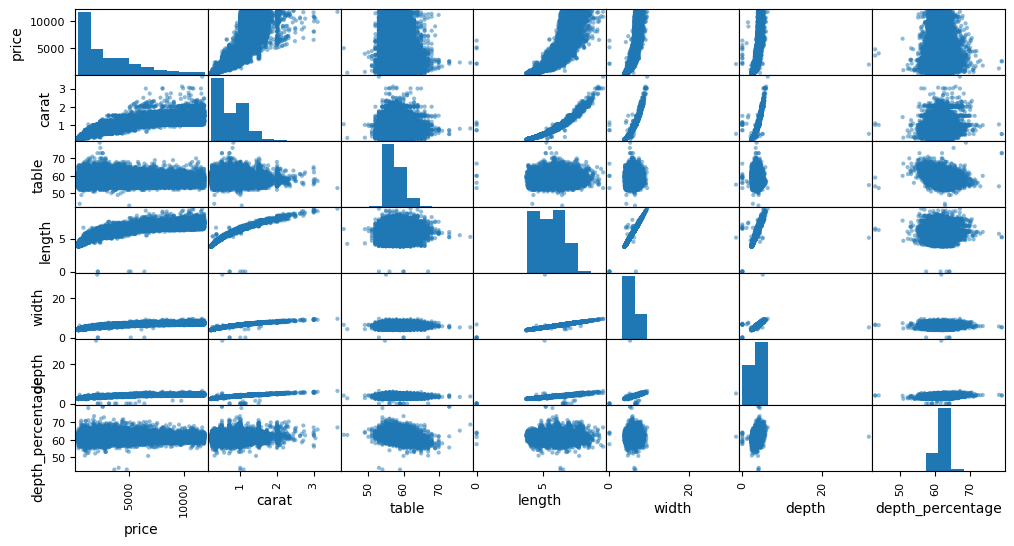

In [15]:
#scatter matrix for a visual representation of all of my numerical values against each other

num_attributes = diamonds_df[['price','carat', 'table', 'length', 'width', 'depth', 'depth_percentage']]

from pandas.plotting import scatter_matrix

# plots scatterplots and histograms when variable is compared against itself
scatter_matrix(num_attributes, figsize=(12, 6))
plt.show()

In [16]:
#create a correlation matrix between my target and numerical features

corr_matrix = num_attributes.corr()

corr_matrix["price"].sort_values(ascending=False)

price               1.000000
carat               0.915825
length              0.895808
width               0.891479
depth               0.869637
table               0.128120
depth_percentage    0.004075
Name: price, dtype: float64

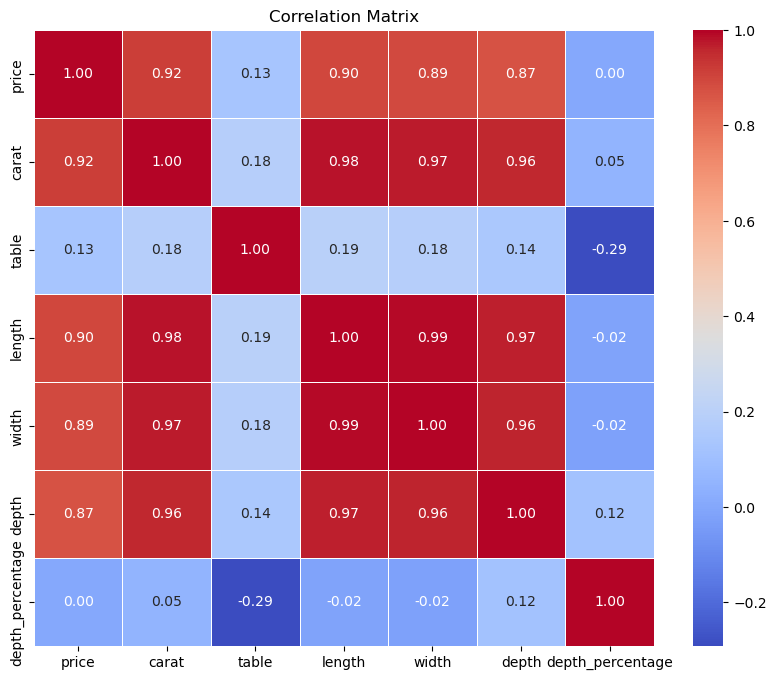

In [17]:
#heatmap for the above correlations

import seaborn as sns

plt.figure(figsize=(10, 8))  # Adjust figsize as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [18]:
#Create our features and target

target_price = diamonds_df['price']
price_features = diamonds_df.drop(['price', 'table', 'depth_percentage'], axis=1)

from sklearn.model_selection import train_test_split

# Split target and feature variables into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(price_features, target_price, test_size=0.2, random_state=42)

In [21]:
#Feature Selection for our target

numerical_columns = diamonds_df[['carat','length', 'width', 'depth']]

ordinal_columns = diamonds_df[['cut', 'color', 'clarity']]

In [22]:
#imports for making our pipelines

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [23]:
#creating our numeric pipeline, imputer not needed in this instance but included

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [24]:
from sklearn.preprocessing import OrdinalEncoder

# Create ordinal pipeline, impute missing values, and use ordinal encoding
ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

In [25]:
#create objects for our numerical columns and our categorical columns
num_attributes = list(numerical_columns)
ord_attributes = list(ordinal_columns)

#create the columntransformer object preprocessing
preprocessing = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_attributes),
        ('ord', ordinal_pipeline, ord_attributes)
        ])

#use fit_transform on the xtrain dataset and create object X_trained_prepared
X_train_prepared = preprocessing.fit_transform(X_train)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#instantiate a linear model, fit it with our preprocessed x train data and our y train data
lin_reg = LinearRegression() 
lin_reg.fit(X_train_prepared, y_train)

#get rmse scores for our linear model
cv_scores_lin_model = -cross_val_score(lin_reg, X_train_prepared, y_train,
                         scoring="neg_root_mean_squared_error", cv=3)

pd.Series(cv_scores_lin_model).describe()

count       3.000000
mean     1003.126041
std         2.943450
min      1001.315945
25%      1001.427868
50%      1001.539790
75%      1004.031088
max      1006.522386
dtype: float64

In [151]:
#instatiate a Random Forest Regression Model, and fit the model with our preprocessed x train data and our y train data

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_features='sqrt', max_depth=11)

rf_model.fit(X_train_prepared, y_train)

#get my rmse scores
cv_rmse_scores_rf = -cross_val_score(rf_model,X_train_prepared, y_train, scoring = "neg_root_mean_squared_error", cv=3)

pd.Series(cv_rmse_scores_rf).describe()

count      3.000000
mean     482.959906
std        8.419141
min      477.205813
25%      478.128385
50%      479.050956
75%      485.836952
max      492.622949
dtype: float64

In [ ]:
#My random forest model does a much better job then the linear model. Will continue with this model from this point.

In [153]:
#Check the r2 scores across folds to examine results for overfitting, I do not suspect overfitting.

cv_r2_scores_rf = cross_val_score(rf_model,X_train_prepared, y_train, scoring = "r2", cv=3)

print(f'Cross-Validation R² Scores: {cv_r2_scores_rf}')

Cross-Validation R² Scores: [0.96988749 0.96976518 0.97030803]


In [155]:
#fit.transform our x_test data so we can make predictions

X_test_transformed = preprocessing.fit_transform(X_test)

In [157]:
#use our preprocessed x_test data for the predictions
rf_predictions = rf_model.predict(X_test_transformed)

#use our preprocessed x_train data to make training data predictions
rf_training_predictions = rf_model.predict(X_train_prepared)

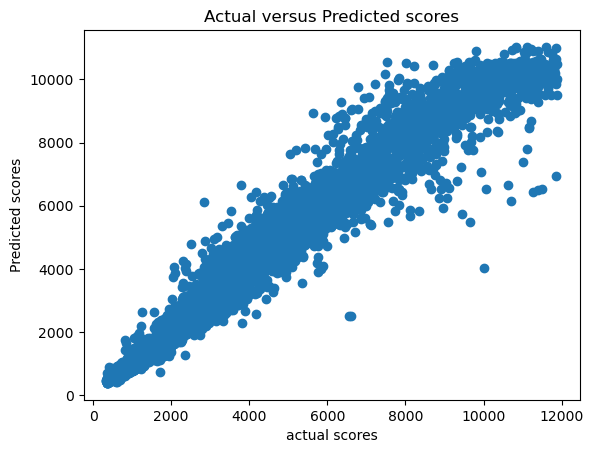

In [158]:
x_axis = y_test

y_axis = rf_predictions

plt.scatter(x_axis, y_axis)
plt.xlabel('actual scores')
plt.ylabel('Predicted scores')
plt.title('Actual versus Predicted scores')
plt.show()

In [161]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rmse_rf_test = mean_squared_error(y_test, rf_predictions, squared=False)
r2_rf_test = r2_score(y_test, rf_predictions)

rmse_rf_train = mean_squared_error(y_train, rf_training_predictions, squared=False)
r2_rf_train = r2_score(y_train, rf_training_predictions)

print('The RMSE score for the test data is ', rmse_rf_test)
print('The r2 score for the test data is ', r2_rf_test)
print('The RMSE score for the train data is ', rmse_rf_train)
print('The r2 score for the train data is ', r2_rf_train)

The RMSE score for the test data is  481.4962962938974
The r2 score for the test data is  0.9685656528744904
The RMSE score for the train data is  418.9568438123847
The r2 score for the train data is  0.9772337709732375


C:\Users\mmice\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mmice\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
